In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("consumption_temp.csv")
df['time'] = pd.to_datetime(df['time'])

In [3]:
df.dtypes

time           datetime64[ns]
location               object
consumption           float64
temperature           float64
dtype: object

In [4]:
locations = df['location'].unique()

for location in locations:
    subset = df[df['location'] == location]

    # Create subplot with 2 y-axes
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add temperature trace (left y-axis)
    fig.add_trace(go.Scatter(x=subset['time'], 
                             y=subset['temperature'], 
                             name=f"Temperature",
                             line=dict(color='blue')),
                  secondary_y=False)

    # Add consumption trace (right y-axis)
    fig.add_trace(go.Scatter(x=subset['time'], 
                             y=subset['consumption'], 
                             name=f"Consumption",
                             line=dict(color='red')),
                  secondary_y=True)

    # Update yaxis titles
    fig.update_layout(
        title_text=f"Temperature and Consumption in {location}",
        xaxis_title="Time",
        yaxis_title="Forecasted Temperature (Celcius)",
        yaxis2_title="Average Hourly Consumption (MW)",
    )

    fig.show()


In [5]:
def compute_stats(group):
    return pd.Series({
        'Min Temperature': group['temperature'].min().round(2),
        'Max Temperature': group['temperature'].max().round(2),
        'Std Dev Temperature': group['temperature'].std().round(2),
        'Min Consumption': group['consumption'].min().round(2),
        'Max Consumption': group['consumption'].max().round(2),
        'Std Dev Consumption': group['consumption'].std().round(2),
        'Correlation': group['temperature'].corr(group['consumption']).round(2)
    })

# Group by location and apply the compute_stats function
stats_df = df.groupby('location').apply(compute_stats)

print(stats_df)

             Min Temperature  Max Temperature  Std Dev Temperature  \
location                                                             
bergen                 -15.6             29.3                 6.56   
helsingfors            -10.1             24.0                 7.59   
oslo                   -15.4             29.8                 8.77   
stavanger               -9.2             27.0                 5.84   
tromsø                 -14.6             29.8                 7.97   
trondheim              -17.3             30.5                 7.62   

             Min Consumption  Max Consumption  Std Dev Consumption  \
location                                                             
bergen                  0.44             4.65                 1.16   
helsingfors             0.00             7.86                 0.92   
oslo                    1.52            18.05                 4.67   
stavanger               0.83             8.76                 2.11   
tromsø             

In [36]:
import plotly.express as px

# Get the default color cycle from Plotly Express
default_colors = px.colors.DEFAULT_PLOTLY_COLORS

# Print the hex color codes
print(default_colors)

['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)']


In [38]:
rgb_colors = [
    'rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)',
    'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
    'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)',
    'rgb(23, 190, 207)'
]

hex_colors = ['#' + ''.join('{:02x}'.format(int(c))
                            for c in rgb.split('(')[1].split(')')[0].split(',')) for rgb in rgb_colors]

In [39]:
print(hex_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [87]:
import matplotlib.pyplot as plt


def plot_consumption(df, locations):
    # Define your colors dictionary
    colors = {
        'bergen': '#1f77b4',
        'oslo': '#d62728',
        'stavanger': '#2ca02c',
        'tromsø': '#9467bd',
        'trondheim': '#ff7f0e',
        'helsingfors': 'cyan'
    }

    # Create a larger figure for better visibility
    plt.figure(figsize=(16, 6))

    # Iterate through the locations
    for location in locations:
        subset = df[df['location'] == location]

        # Plot the temperature and consumption with the label and specified color
        plt.plot(subset['time'],
                 subset['consumption'],
                 label=location.capitalize(),
                 linewidth=0.5,
                 color=colors.get(location.lower(), 'black'))  # Use color from the dictionary, default to black if not found

    # Set title and labels
    plt.title('Average Hourly Consumption', fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)

    # Set legend
    plt.legend(title="Location", title_fontsize='13',
               fontsize='11', loc='upper left')

    # Show the figure
    plt.show()

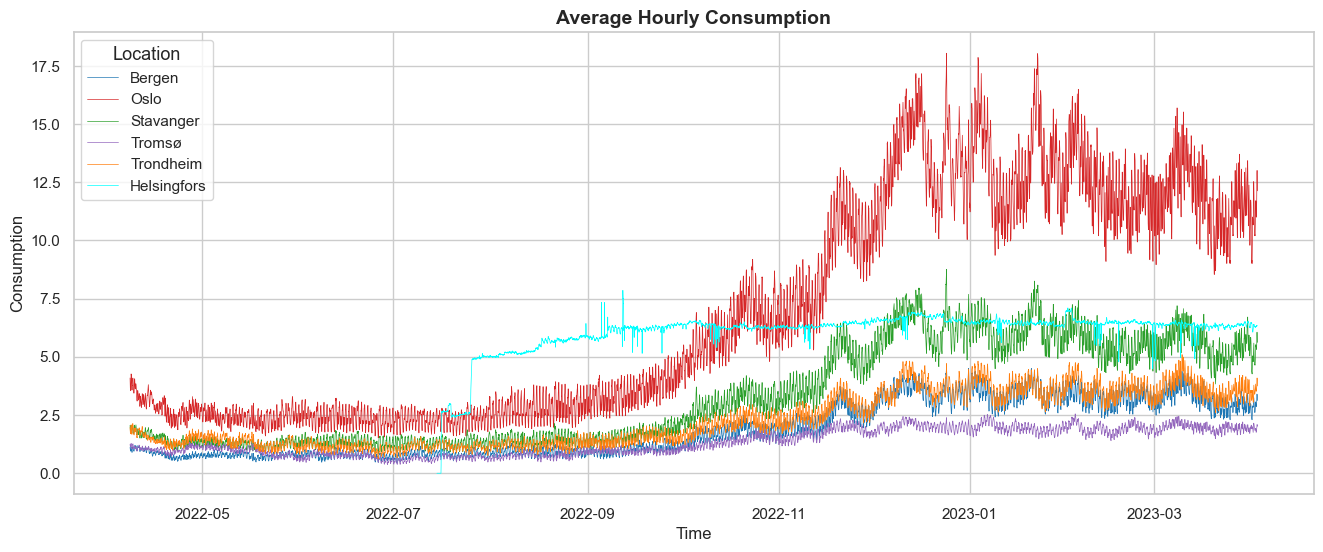

In [88]:
plot_consumption(df, locations)

In [91]:
# plot temperature in one plot

def plot_temperature(df, locations):
    colors = {
        'bergen': '#1f77b4',
        'oslo': '#d62728',
        'stavanger': '#2ca02c',
        'tromsø': '#9467bd',
        'trondheim': '#ff7f0e',
        'helsingfors': 'cyan'
    }

    # Create a larger figure for better visibility
    plt.figure(figsize=(16, 6))

    # Iterate through the locations
    for location in locations:
        subset = df[df['location'] == location]

        # Plot the temperature and consumption with the label and specified color
        plt.plot(subset['time'],
                 subset['temperature'],
                 label=location.capitalize(),
                 linewidth=0.5,
                 color=colors.get(location.lower(), 'black'))  # Use color from the dictionary, default to black if not found

    # Set title and labels
    plt.title('Forecasted Temperature for each hour', fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Temperature', fontsize=12)

    # Set legend
    plt.legend(title="Location", title_fontsize='13',
               fontsize='11', loc='upper left')

    # Show the figure
    plt.show()

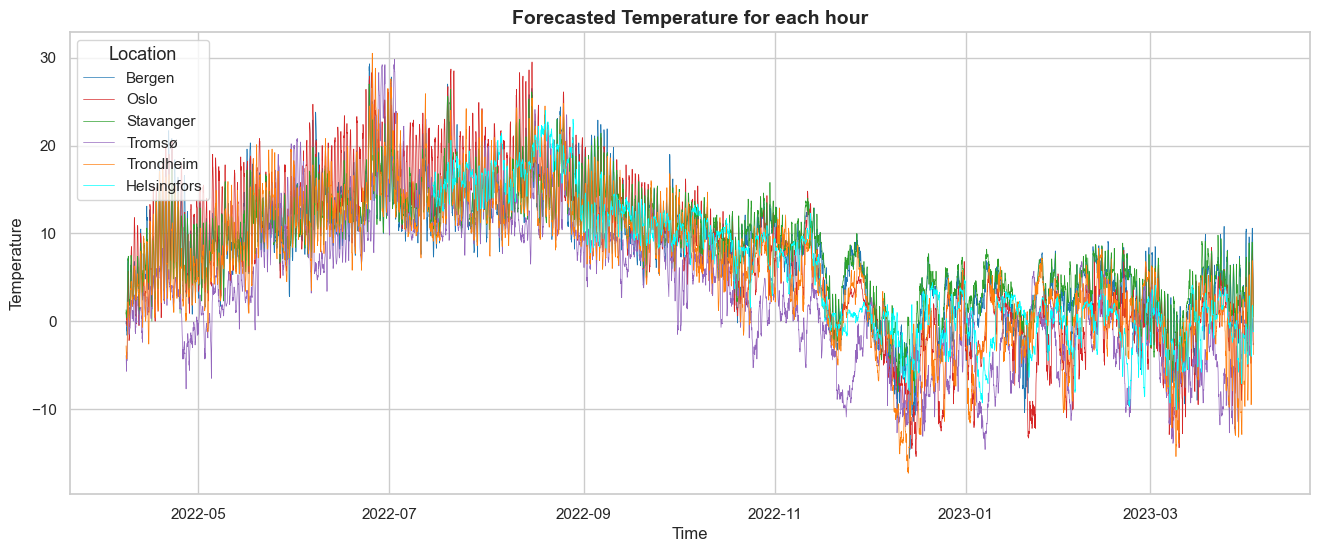

In [92]:
plot_temperature(df, locations)

In [118]:
# find the date that is 80% of the way through all the data

df['time'].describe()

# the date 73 days from the end of the data is 80% of the way through the data
# the date 73 days from the end of the data is 2023-01-25 21:00:00

/var/folders/4j/dxkybcjx57g2_q7pvt8nkd040000gn/T/ipykernel_3226/3352691819.py:3: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   49494
unique                   8641
top       2022-10-04 21:00:00
freq                        6
first     2022-04-07 21:00:00
last      2023-04-02 21:00:00
Name: time, dtype: object

In [116]:
import datetime

def plot_consumption(df, locations, train_end_date_str):
    # Convert string to datetime object
    train_end_date = datetime.datetime.strptime(
        train_end_date_str, '%Y-%m-%d %H:%M:%S')

    # Define your colors dictionary for lines
    colors = {
        'bergen': '#1f77b4',
        'oslo': '#d62728',
        'stavanger': '#2ca02c',
        'tromsø': '#9467bd',
        'trondheim': '#ff7f0e',
        'helsingfors': 'cyan'
    }

    # Light grey for the 'train' part of the data
    train_color = '#d3d3d3'

    # Create a larger figure for better visibility
    plt.figure(figsize=(16, 6))

    # Plot all locations in light grey first
    for location in locations:
        subset = df[df['location'] == location]
        plt.plot(subset['time'], subset['consumption'],
                 label=location.capitalize(), linewidth=0.5, color=train_color)

    # Overlay the 'test' location with its color
    for location in locations:
        subset = df[df['location'] == location]
        # Use only the 'test' portion of the data based on train_end_date
        test_subset = subset[subset['time'] > train_end_date]
        plt.plot(test_subset['time'], test_subset['consumption'],
                 linewidth=0.5, color=colors[location.lower()])

        # Optionally, fill the area under the plot, with reduced opacity
        plt.fill_between(test_subset['time'], test_subset['consumption'],
                         color=colors[location.lower()], alpha=0.1)

    # Separate the train and test sections visually
    plt.axvline(x=train_end_date, color='black', linestyle='--', linewidth=1)

    # Annotate the train and test sections
    plt.text(df['time'].min(), plt.ylim()[1], 'TRAIN',
             ha='left', va='bottom', fontsize=12, color='grey')
    plt.text(train_end_date, plt.ylim()[
             1], 'TEST', ha='left', va='bottom', fontsize=12, color='black')

    # Set title and labels
    plt.title('Average Hourly Consumption', fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)

    # Set legend
    plt.legend(title="Location", title_fontsize='13',
               fontsize='11', loc='upper left')

    # Show the figure
    plt.show()


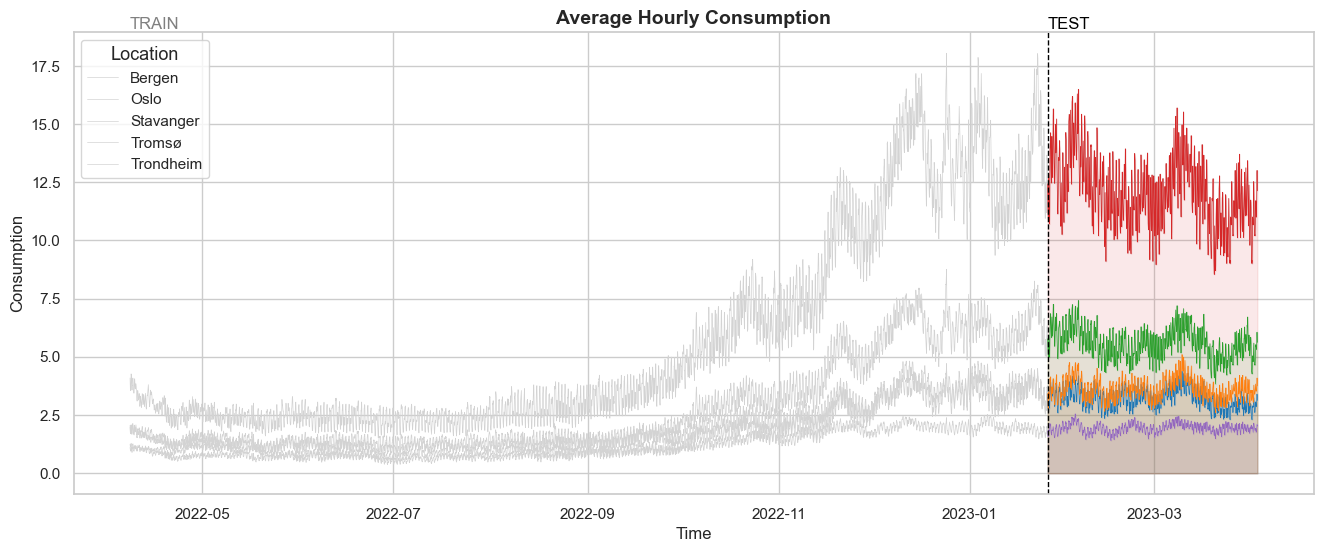

In [119]:
plot_consumption(df, ['bergen', 'oslo', 'stavanger',
                 'tromsø', 'trondheim'], '2023-01-25 21:00:00')

In [184]:
import matplotlib.pyplot as plt


def plot_consumption(df, locations, train_end_date_str):
    # Convert string to datetime object
    train_end_date = datetime.datetime.strptime(
        train_end_date_str, '%Y-%m-%d %H:%M:%S')

    # Define your colors dictionary for lines
    colors = {
        'bergen': '#1f77b4',
        'oslo': '#d62728',
        'stavanger': '#2ca02c',
        'tromsø': '#9467bd',
        'trondheim': '#ff7f0e',
        'helsingfors': 'cyan'
    }

    # Neutral color for the 'test' part of the data
    test_color = '#d3d3d3'

    # Create a larger figure for better visibility
    plt.figure(figsize=(16, 6))

    # Plot all locations with their colors for the train part and neutral color for test part
    for location in locations:
        subset = df[df['location'] == location]
        # Separate the data into train and test subsets
        train_subset = subset[subset['time'] <= train_end_date]
        test_subset = subset[subset['time'] > train_end_date]

        # Plot the 'train' portion of the data with the location's color
        plt.plot(train_subset['time'], train_subset['consumption'],
                 label=location.capitalize(), linewidth=0.5, color=colors[location.lower()])

        # Plot the 'test' portion of the data with the neutral color
        plt.plot(test_subset['time'], test_subset['consumption'],
                 linewidth=0.5, color='darkgrey')

        # Optionally, fill the area under the 'train' plot, with reduced opacity
        plt.fill_between(train_subset['time'], train_subset['consumption'],
                         color=colors[location.lower()], alpha=0.1)

    # Separate the train and test sections visually
    plt.axvline(x=train_end_date, color='black', linestyle='--', linewidth=1)

    # Annotate the train and test sections
    plt.text(df['time'].min(), plt.ylim()[1], 'TRAIN 80%',
             ha='left', va='bottom', fontsize=12, color='black', fontweight='bold')
    plt.text(train_end_date, plt.ylim()[1], 'TEST 20%', 
             ha='left', va='bottom', fontsize=12, color='black', fontweight='bold')

    # Set title and labels
    plt.title('Train-Test split', fontsize=20, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)

    # Set legend
    #plt.legend(title="Location", title_fontsize='13', fontsize='11', loc='upper left')

    # Show the figure
    plt.show()

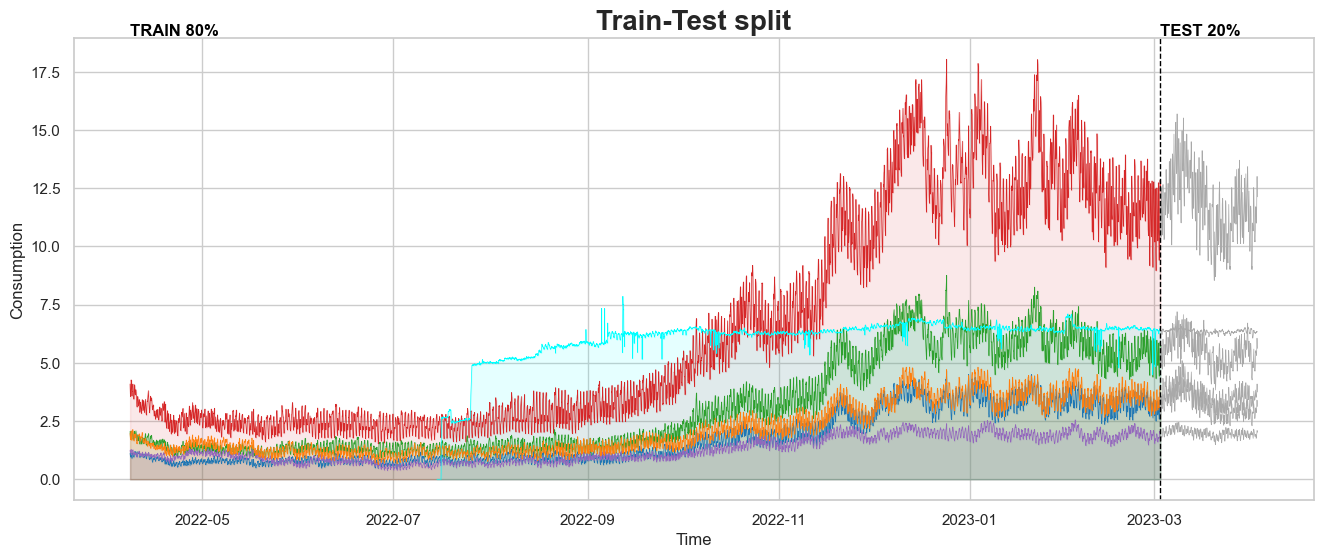

In [186]:
plot_consumption(df, ['bergen', 'oslo', 'stavanger', 'tromsø',
                 'trondheim', 'helsingfors'], '2023-03-02 21:00:00')

In [204]:
import matplotlib.pyplot as plt
import datetime


def plot_consumption(df, locations, train_end_date_str):
    # Convert string to datetime object
    train_end_date = datetime.datetime.strptime(
        train_end_date_str, '%Y-%m-%d %H:%M:%S')

    # Define your colors dictionary for lines
    colors = {
        'bergen': '#1f77b4',
        'oslo': '#d62728',
        'stavanger': '#2ca02c',
        'tromsø': '#9467bd',
        'trondheim': '#ff7f0e',
        'helsingfors': 'cyan'
    }

    # Neutral color for the 'test' part of the data
    test_color = 'darkgrey'
    # Light blue color for the 'test' section background
    test_section_bg = '#e0f2ff'
    # a slightly darker shade of the same blue as the 'test' section background
    test_section_bg2 = '#a6d8ff'

    # Create a larger figure for better visibility
    plt.figure(figsize=(16, 6))

    # Plot all locations with their colors for the train part and neutral color for test part
    for location in locations:
        subset = df[df['location'] == location]
        # Separate the data into train and test subsets
        train_subset = subset[subset['time'] <= train_end_date]
        test_subset = subset[subset['time'] > train_end_date]

        # Plot the 'train' portion of the data with the location's color
        plt.plot(train_subset['time'], train_subset['consumption'],
                 label=location.capitalize(), linewidth=0.5, color=colors[location.lower()])

        # Plot the 'test' portion of the data with the neutral color
        plt.plot(test_subset['time'], test_subset['consumption'],
                 linewidth=0.5, color=colors[location.lower()])

    # Add a light blue background for the test section
    plt.axvspan(train_end_date, df['time'].max(),
                facecolor=test_section_bg2, zorder=-1)

    # Separate the train and test sections visually
    plt.axvline(x=train_end_date, color='black', linestyle='--', linewidth=1)
    
    top_y_position = plt.ylim()[1] - 2 * (plt.ylim()[1] - plt.ylim()[0]) * 0.05
    # Annotate the train and test sections
    plt.text(df['time'].min(), top_y_position, 'TRAIN',
             ha='left', va='bottom', fontsize=27, color='black', fontweight='bold')
    plt.text(train_end_date, top_y_position, 'TEST',
             ha='left', va='bottom', fontsize=27, color='black', fontweight='bold')

    # Set title and labels
    #plt.title('Train-Test Split', fontsize=30, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)

    # Show the figure
    plt.grid(False)
    plt.show()

# Example usage
# plot_consumption(df, ['bergen', 'oslo', 'stavanger', 'tromsø', 'trondheim', 'helsingfors'], '2023-04-02 21:00:00')

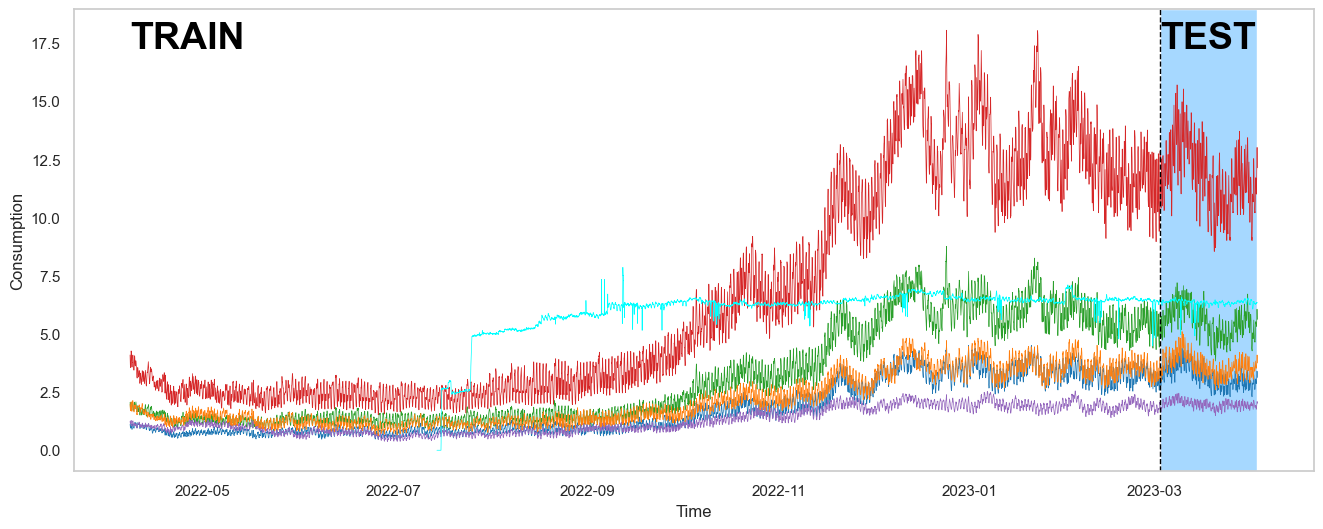

In [205]:
plot_consumption(df, ['bergen', 'oslo', 'stavanger', 'tromsø',
                 'trondheim', 'helsingfors'], '2023-03-02 21:00:00')